In [1]:
import act
import xarray as xr
import pandas as pd
import numpy
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ISDAC April 8 2008 Microphysics (LWC/IWC)

In [5]:
ds = xr.open_dataset('../data/isdac.microphysics.080408f2.1s.nc')
base_time = datetime.datetime(2008, 4, 8, 0, 0, 0)
ds['time'] = (('time'), np.array([
    datetime.datetime.strptime('2008-04-08 %06d' % x, '%Y-%m-%d %H%M%S') for x in ds.Time]))     

In [6]:
ds

<xarray.Dataset>
Dimensions:         (time: 13343, liquid_bin_length: 111, ice_bin_length: 102)
Coordinates:
  * time            (time) datetime64[ns] 2008-04-08T19:54:00 ... 2008-04-08T...
Dimensions without coordinates: liquid_bin_length, ice_bin_length
Data variables: (12/22)
    Time            (time) float64 ...
    bin_liquid_mid  (liquid_bin_length) float64 ...
    bin_ice_mid     (ice_bin_length) float64 ...
    bin_liquid_max  (liquid_bin_length) float64 ...
    bin_ice_max     (ice_bin_length) float64 ...
    bin_liquid_min  (liquid_bin_length) float64 ...
    ...              ...
    r_el            (time) float64 ...
    r_ei            (time) float64 ...
    dmm_l           (time) float64 ...
    dmm_i           (time) float64 ...
    beta_l          (time) float64 ...
    beta_i          (time) float64 ...

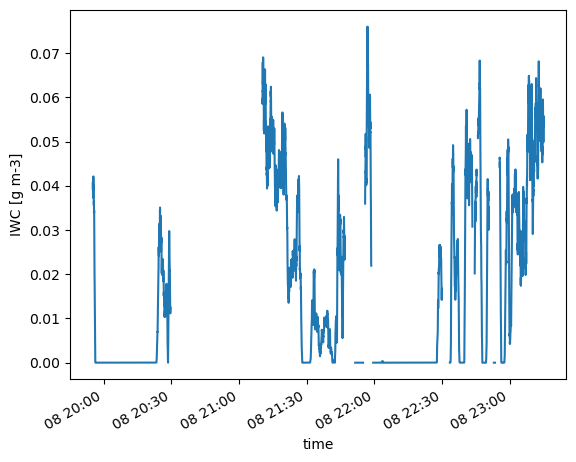

In [7]:
(ds.IWC).rolling(time=30).mean().plot()

In [8]:
inds_leg1 = np.logical_and(ds.time.values > np.datetime64('2008-04-08 23:00:00'),
                           ds.time.values < np.datetime64('2008-04-08 23:15:00'))
inds_leg1 = np.logical_and(inds_leg1, ds.IWC.values > 0.001)
#inds_leg1 = np.logical_and(inds_leg1, ds.LWC.values > 0.001)
inds_leg2 = np.logical_and(ds.time.values > np.datetime64('2008-04-08 23:15:00'),
                           ds.time.values < np.datetime64('2008-04-08 23:30:00'))
inds_leg2 = np.logical_and(inds_leg2, ds.IWC.values > 0.001)
#inds_leg2 = np.logical_and(inds_leg2, ds.LWC.values > 0.001)
iwc_leg1 = np.nanmean(ds.IWC[inds_leg1])
iwc_leg2 = np.nanmean(ds.IWC[inds_leg2])
lwc_leg1 = np.nanmean(ds.LWC[inds_leg1])
lwc_leg2 = np.nanmean(ds.LWC[inds_leg2])

In [23]:
shupe_turner = act.io.read_netcdf('../data/nsamicrobase2shupeturnC1.c1.20080408.001000.cdf')
shupe_turner

<xarray.Dataset>
Dimensions:                 (time: 1440, nheights: 150, instrum: 6)
Coordinates:
    time                    (time) datetime64[ns] 2008-04-08 ... 2008-04-08T2...
Dimensions without coordinates: nheights, instrum
Data variables: (12/13)
    base_time               datetime64[ns] 2008-04-08
    Heights                 (nheights) float32 dask.array<chunksize=(150,), meta=np.ndarray>
    Avg_Retrieved_LWC       (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Avg_Retrieved_IWC       (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Avg_LiqEffectiveRadius  (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Avg_IceEffectiveRadius  (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    ...                      ...
    CloudPhaseMask          (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    CloudRetrievalMask      (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Instruments             (instrum) int16 dask.array<chunksize=(6,), meta=np.ndarray>
    lat                     float32 ...
    lon                     float32 ...
    alt                     float32 ...
Attributes:
    Date:                 Thu Aug 25 21:35:30 2016
    Version:              ST2
    Command_Line:          
    Input_Platforms:       
    Observatory:          nsa
    Contact:              Matthew Shupe (303-497-6471), David Turner (608-263...
    _file_dates:          ['20080408']
    _file_times:          ['001000']
    _datastream:          act_datastream
    _arm_standards_flag:  0

In [25]:
shupe_turner = act.io.read_netcdf('../data/nsamicrobase2shupeturnC1.c1.20080408.001000.cdf')
shupe_turner
microbase = act.io.read_netcdf('../data/nsamicrobasepiavgC1.c1.20080408.001000.cdf')
microbase

<xarray.Dataset>
Dimensions:                    (time: 72, heights: 233)
Coordinates:
  * time                       (time) datetime64[ns] 2008-04-08T00:10:00 ... ...
  * heights                    (heights) float32 149.5 212.5 ... 2.285e+04
Data variables: (12/16)
    base_time                  datetime64[ns] 2008-04-08T00:10:00
    time_offset                (time) datetime64[ns] 2008-04-08T00:10:00 ... ...
    avg_retrieved_lwc          (time, heights) float32 dask.array<chunksize=(72, 233), meta=np.ndarray>
    avg_retrieved_iwc          (time, heights) float32 dask.array<chunksize=(72, 233), meta=np.ndarray>
    avg_liq_effective_radius   (time, heights) float32 dask.array<chunksize=(72, 233), meta=np.ndarray>
    avg_ice_effective_radius   (time, heights) float32 dask.array<chunksize=(72, 233), meta=np.ndarray>
    ...                         ...
    integrated_cloud_fraction  (time) float32 dask.array<chunksize=(72,), meta=np.ndarray>
    aqc_cloud_fraction         (time) float32 dask.array<chunksize=(72,), meta=np.ndarray>
    aqc_cloud_missing          (time) float32 dask.array<chunksize=(72,), meta=np.ndarray>
    lat                        float32 ...
    lon                        float32 ...
    alt                        float32 ...
Attributes: (12/15)
    process_version:                $State: vap-microbasepi-1.2-1.sol5_10 $
    command_line:                   /apps/process/bin/microbasepi -d 20080408...
    site_id:                        nsa
    facility_id:                    C1: Barrow, Alaska
    input_datastreams_description:  A string consisting of the datastream(s),...
    input_datastreams_num:          3
    ...                             ...
    qc_standards_version:           1.0 
    _file_dates:                    ['20080408']
    _file_times:                    ['001000']
    datastream:                     nsamicrobasepiavgC1.c1
    _datastream:                    nsamicrobasepiavgC1.c1
    _arm_standards_flag:            1

In [56]:
shupe_turner["nheights"] = shupe_turner["Heights"]
shupe_turner

<xarray.Dataset>
Dimensions:                 (time: 1440, nheights: 150, instrum: 6)
Coordinates:
    time                    (time) datetime64[ns] 2008-04-08 ... 2008-04-08T2...
  * nheights                (nheights) float32 150.0 250.0 ... 1.505e+04
Dimensions without coordinates: instrum
Data variables: (12/13)
    base_time               datetime64[ns] 2008-04-08
    Heights                 (nheights) float32 dask.array<chunksize=(150,), meta=np.ndarray>
    Avg_Retrieved_LWC       (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Avg_Retrieved_IWC       (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Avg_LiqEffectiveRadius  (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Avg_IceEffectiveRadius  (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    ...                      ...
    CloudPhaseMask          (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    CloudRetrievalMask      (time, nheights) float32 dask.array<chunksize=(1440, 150), meta=np.ndarray>
    Instruments             (instrum) int16 dask.array<chunksize=(6,), meta=np.ndarray>
    lat                     float32 ...
    lon                     float32 ...
    alt                     float32 ...
Attributes:
    Date:                 Thu Aug 25 21:35:30 2016
    Version:              ST2
    Command_Line:          
    Input_Platforms:       
    Observatory:          nsa
    Contact:              Matthew Shupe (303-497-6471), David Turner (608-263...
    _file_dates:          ['20080408']
    _file_times:          ['001000']
    _datastream:          act_datastream
    _arm_standards_flag:  0

## Microbase IWC

(0.0, 1000.0)

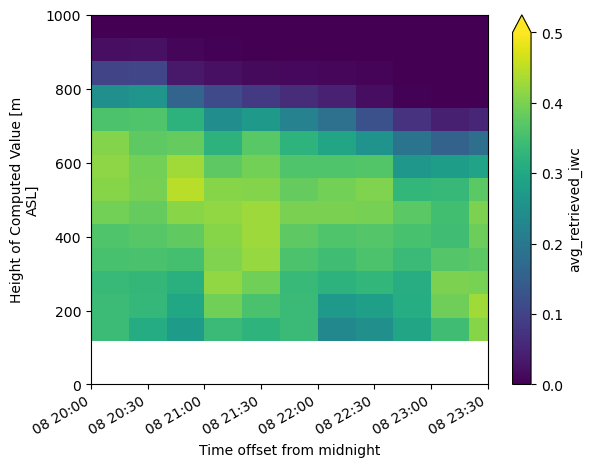

In [66]:
(microbase.avg_retrieved_iwc/1e3).T.plot(vmin=0, vmax=0.5)
plt.xlim([np.datetime64('2008-04-08 20:00:00'), np.datetime64('2008-04-08 23:30:00')])
plt.ylim([0, 1000])

## Shupe-Turner IWC

/Users/rjackson/mambaforge/envs/act_env/lib/python3.11/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


(0.0, 1000.0)

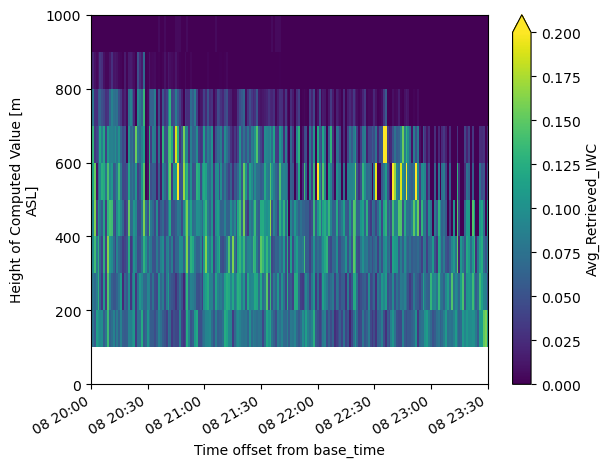

In [64]:
(shupe_turner.Avg_Retrieved_IWC/1e3).T.plot(vmax=0.2)
plt.xlim([np.datetime64('2008-04-08 20:00:00'), np.datetime64('2008-04-08 23:30:00')])
plt.ylim([0, 1000])

In [33]:
convair_Apr8f2 = act.io.read_csv('../data/001F16_195400.txt', skiprows=3, )

(0.0, 2000.0)

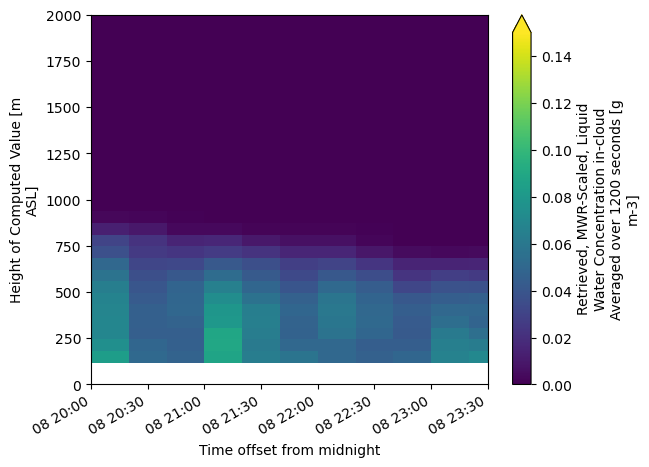

In [40]:
microbase.avg_retrieved_lwc.T.plot(vmax=0.15)
plt.xlim([np.datetime64('2008-04-08 20:00:00'), np.datetime64('2008-04-08 23:30:00')])
plt.ylim([0, 2000])

/Users/rjackson/mambaforge/envs/act_env/lib/python3.11/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


(0.0, 2000.0)

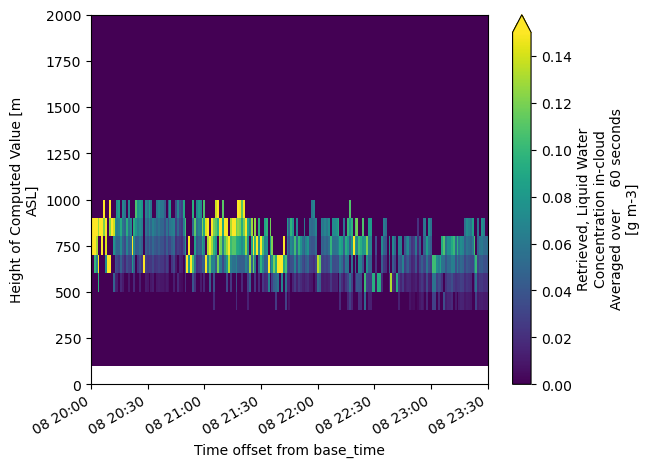

In [39]:
shupe_turner.Avg_Retrieved_LWC.T.plot(vmax=0.15)
plt.xlim([np.datetime64('2008-04-08 20:00:00'), np.datetime64('2008-04-08 23:30:00')])
plt.ylim([0, 2000])

In [ ]:
alt = microbase.avg_retrieved_iwc.T.plot(vmin=0, vmax=500)

In [42]:
times = []
for i in range(2, len(convair_Apr8f2[' HH'].data)):
        h = int(convair_Apr8f2[' HH'][i])
        m = int(convair_Apr8f2['MM'][i])
        s = int(convair_Apr8f2['SS'][i])
        times.append(datetime.datetime(2008, 4, 8, h, m, s))

In [212]:
convair_Apr8f2

<xarray.Dataset>
Dimensions:         (index: 13345)
Coordinates:
  * index           (index) int64 0 1 2 3 4 5 ... 13340 13341 13342 13343 13344
Data variables: (12/66)
     HH             (index) object '   ' ... ' 23'
    MM              (index) object 'UT' None '54' '54' ... '36' '36' '36' '36'
    SS              (index) object 'C ' None '00' '01' ... '19' '20' '21' '22'
     HH.1           (index) object '   ' None ' 19' ' 19' ... ' 23' ' 23' ' 23'
    MM.1            (index) object 'DA' None '54' '54' ... '36' '36' '36' '36'
    SS.1            (index) object 'S ' None '00' '01' ... '19' '20' '21' '22'
    ...              ...
      PCTcon        (index) object '    /cm3' None ... '   150.0' '   147.8'
     CVIFlg         (index) object '    0/1' None ... '     -8' '      0'
     CVISamP        (index) object '      mb' None ... '    -8.8' '  1039.7'
     CVISamT        (index) object '   Deg K' None ... '    -8.8' '   287.8'
     CVISampFl      (index) object '      slpm' None ... '     0.010'
      CVI_Eh        (index) float64 nan nan -8.888 ... -8.888 -8.888 -8.888
Attributes:
    _datastream:          001F16_195400.txt
    _site:                001
    _arm_standards_flag:  0

In [22]:
plt.figure(figsize=(15,5))
plt.plot(times,convair_Apr8f2[' ThkAlt'][2:].astype(float))

NameError: name 'times' is not defined

<Figure size 1500x500 with 0 Axes>

In [43]:
plt.plot(times,convair_Apr8f2[' Lat'][2:].astype(float))

KeyError: ' Lat'

In [67]:
times_leg1 = np.logical_and(np.array(times) > datetime.datetime(2008, 4, 8, 23, 0, 0),
                            np.array(times) < datetime.datetime(2008, 4, 8, 23, 15, 0))
times_leg2 = np.logical_and(np.array(times) > datetime.datetime(2008, 4, 8, 23, 15, 0),
                            np.array(times) < datetime.datetime(2008, 4, 8, 23, 30, 0))                            
alt_leg1 = np.mean(convair_Apr8f2[' ThkAlt'][2:][times_leg1])
alt_leg2 = np.mean(convair_Apr8f2[' ThkAlt'][2:][times_leg2])

In [71]:
iwc_alt1 = microbase.avg_retrieved_iwc.sel(heights=alt_leg1, time='23:00:00', method='nearest')
iwc_alt2 = microbase.avg_retrieved_iwc.sel(heights=alt_leg2, time='23:15:00', method='nearest')
lwc_alt1 = microbase.avg_retrieved_lwc.sel(heights=alt_leg1, time='23:00:00', method='nearest')
lwc_alt2 = microbase.avg_retrieved_lwc.sel(heights=alt_leg2, time='23:15:00', method='nearest')
times_leg1 = np.logical_and(
    shupe_turner.Avg_Retrieved_IWC.time.values > np.datetime64('2008-04-08 23:00:00'),
    shupe_turner.Avg_Retrieved_IWC.time.values < np.datetime64('2008-04-08 23:15:00'))
times_leg2 = np.logical_and(
    shupe_turner.Avg_Retrieved_IWC.time.values > np.datetime64('2008-04-08 23:15:00'),
    shupe_turner.Avg_Retrieved_IWC.time.values < np.datetime64('2008-04-08 23:30:00'))
iwc_shupe1 = shupe_turner.Avg_Retrieved_IWC.sel(nheights=alt_leg1, method='nearest')[times_leg1].mean()
iwc_shupe2 = shupe_turner.Avg_Retrieved_IWC.sel(nheights=alt_leg2, method='nearest')[times_leg2].mean()
lwc_shupe1 = shupe_turner.Avg_Retrieved_LWC.sel(nheights=alt_leg1, method='nearest')[times_leg1].mean()
lwc_shupe2 = shupe_turner.Avg_Retrieved_LWC.sel(nheights=alt_leg2, method='nearest')[times_leg2].mean()

/Users/rjackson/mambaforge/envs/act_env/lib/python3.11/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/rjackson/mambaforge/envs/act_env/lib/python3.11/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/rjackson/mambaforge/envs/act_env/lib/python3.11/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/rjackson/mambaforge/envs/act_env/lib/python3.11/site-packages/xarray/coding/variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |=

28.647383


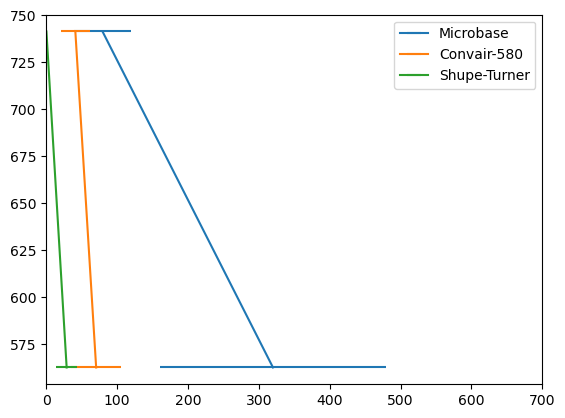

In [76]:
plt.errorbar([iwc_alt1, iwc_alt2], [alt_leg1, alt_leg2], xerr=[iwc_alt1/2, iwc_alt2/2], label='Microbase')
plt.errorbar([iwc_leg1*1e3, iwc_leg2*1e3], [alt_leg1, alt_leg2], xerr=[iwc_leg1*1e3/2, 1e3*iwc_leg2/2],label='Convair-580')
plt.errorbar([iwc_shupe1, iwc_shupe2], [alt_leg1, alt_leg2], xerr=[iwc_shupe1/2, iwc_shupe2/2],label='Shupe-Turner')
plt.legend()
plt.xlim([0, 700])
plt.savefig('microbase_comparison.png')
print(iwc_shupe2.values)

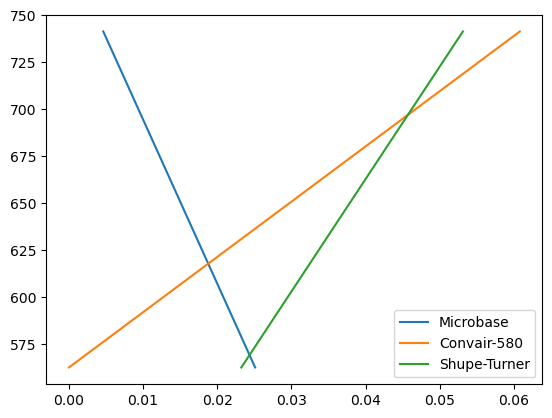

In [77]:
plt.plot([lwc_alt1, lwc_alt2], [alt_leg1, alt_leg2], label='Microbase')
plt.plot([lwc_leg1, lwc_leg2], [alt_leg1, alt_leg2],label='Convair-580')
plt.plot([lwc_shupe1, lwc_shupe2], [alt_leg1, alt_leg2],label='Shupe-Turner')
plt.legend()